# Empirical Survival Function Coverage Results

Notebook with coverage results on simulated data, using the empirical survival function as the survival function estimator.

Jimmy Butler

In [1]:
library(ggplot2)
library(dplyr)
library(tidyr)
library(cowplot)

Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”
Warning message:
“package ‘dplyr’ was built under R version 4.2.3”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“package ‘tidyr’ was built under R version 4.2.3”
Warning message:
“package ‘cowplot’ was built under R version 4.2.3”


In [2]:
res_df <- read.csv('~/isolines_uq/outputs/simulations/empirical_coverage.csv')
full_res <- res_df %>% group_by(dist, p, n, alpha) %>% summarize(covrate=mean(is_covered))

meta_alpha <- 0.05
uncertainty <- qnorm(1-(meta_alpha/2))*(sqrt((full_res$covrate*(1-full_res$covrate))/500))
uncertainty <- round(uncertainty, 3)
full_res$uncertainty <- uncertainty

`summarise()` has grouped output by 'dist', 'p', 'n'. You can override using
the `.groups` argument.


In [3]:
TITLE_FONTSIZE <- 16
AXIS_FONTSIZE <- 15
LEGEND_FONTSIZE <- 15
AX_TITLE_FONTSIZE <- 15

plt_coverages <- function(a, dist, title) {

    plt <- ggplot(full_res %>% filter(alpha==a, dist==distn, n>1000), aes(color=as.factor(p))) + 
    geom_errorbar(aes(x = as.factor(n), ymin=covrate-uncertainty, 
                  ymax=covrate+uncertainty, color=as.factor(p)), width=.1, 
                position=position_dodge(width=0.5)) + 
    geom_hline(yintercept = 1-a, color='red', linetype='dashed') +
    xlab('Sample Size') + ylab('Coverage Rate') +
    geom_point(aes(x=as.factor(n), y=covrate), position=position_dodge(width=0.5)) + theme_light() + 
    ggtitle(paste0(title, ' ', (1-a)*100, '%')) + 
    guides(color=guide_legend(title='p = ')) +
    theme(legend.title=element_text(size=LEGEND_FONTSIZE), legend.position=c(0.8,0.2), 
         legend.background=element_blank(), axis.text.x=element_text(size=AXIS_FONTSIZE), axis.text.y=element_text(size=AXIS_FONTSIZE),
         axis.title.x=element_text(size=AX_TITLE_FONTSIZE), axis.title.y=element_text(size=AX_TITLE_FONTSIZE), plot.title = element_text(size=TITLE_FONTSIZE),
         legend.text=element_text(size=LEGEND_FONTSIZE))

    return(plt)
}

## Bivariate t

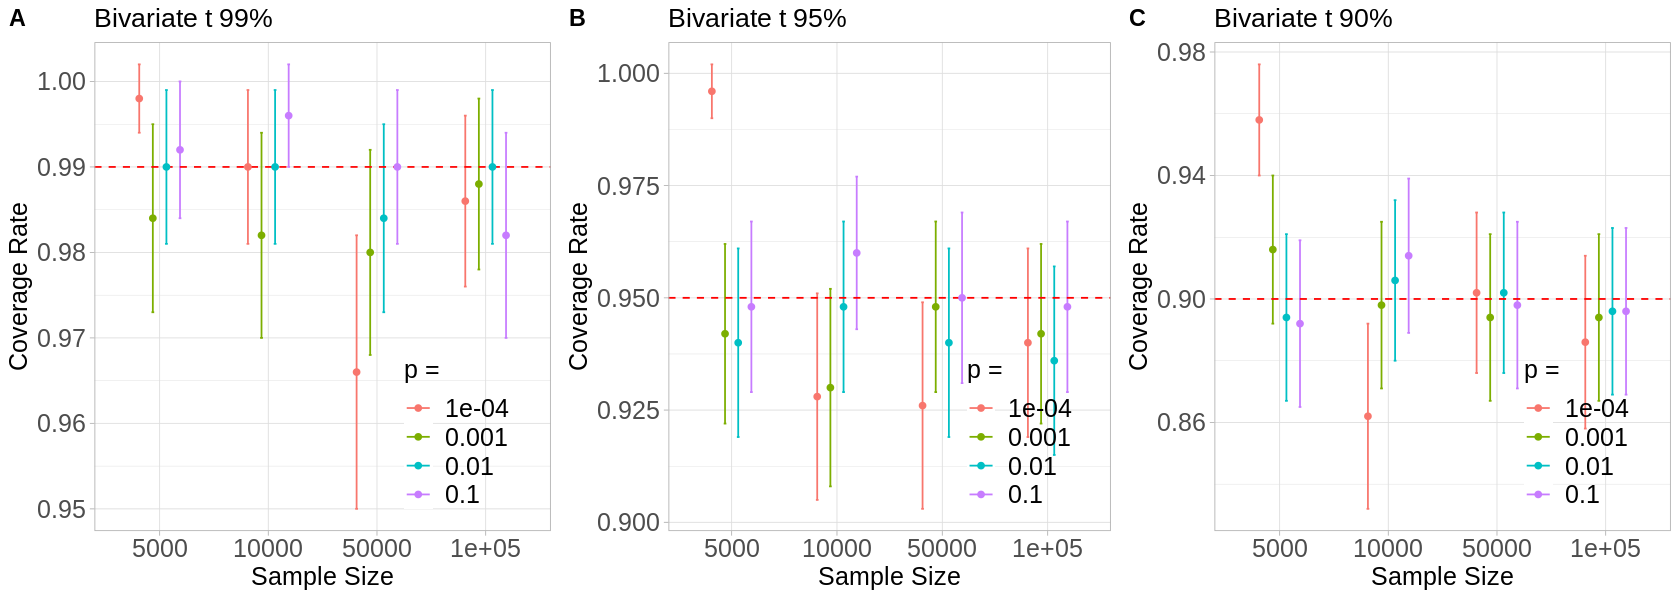

In [4]:
distn <- 'bivt'
title <- 'Bivariate t'

options(repr.plot.width=14, repr.plot.height=5)
plt1 <- plt_coverages(0.01, distn, title)
plt2 <- plt_coverages(0.05, distn, title)
plt3 <- plt_coverages(0.1, distn, title)

plot_grid(plt1, plt2, plt3, ncol = 3, nrow = 1, labels = c("A", "B", "C"))

## Bivariate Gaussian

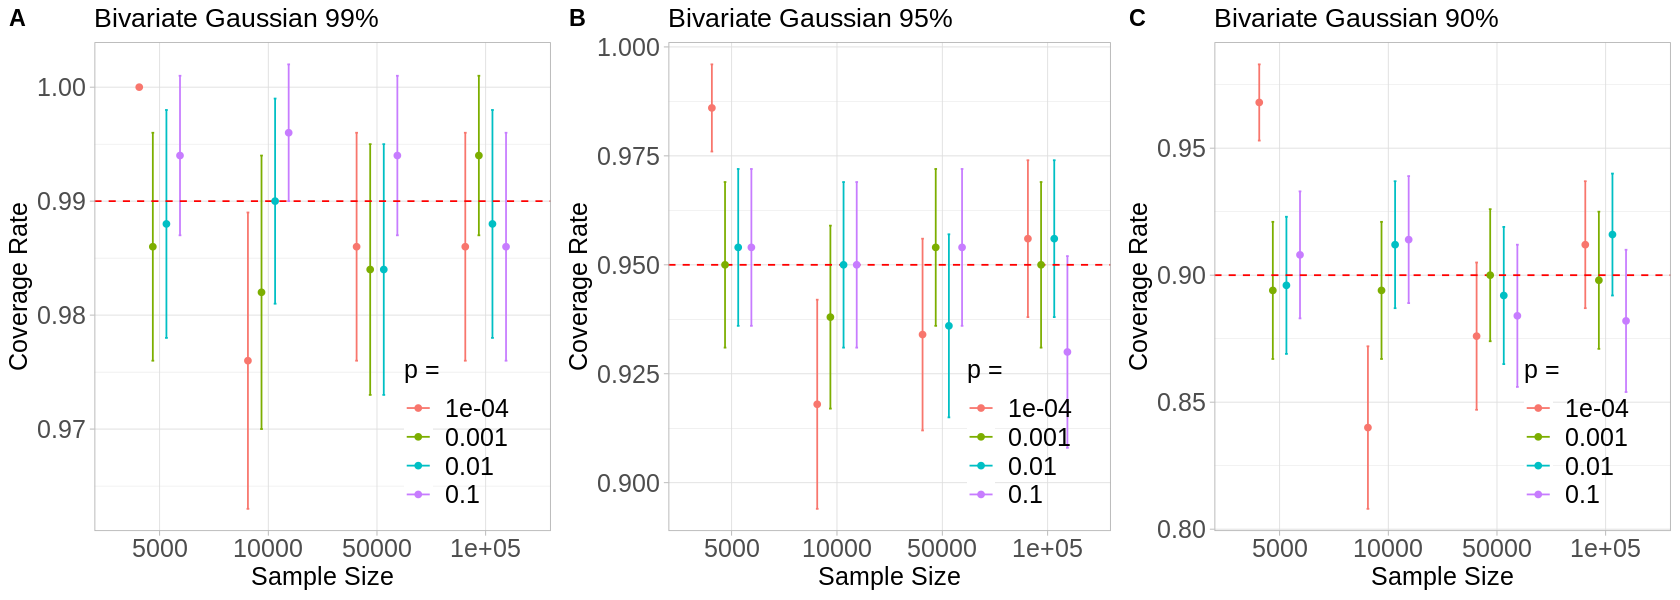

In [5]:
distn <- 'bivgauss'
title <- 'Bivariate Gaussian'

options(repr.plot.width=14, repr.plot.height=5)
plt1 <- plt_coverages(0.01, distn, title)
plt2 <- plt_coverages(0.05, distn, title)
plt3 <- plt_coverages(0.1, distn, title)

plot_grid(plt1, plt2, plt3, ncol = 3, nrow = 1, labels = c("A", "B", "C"))

## Karachi

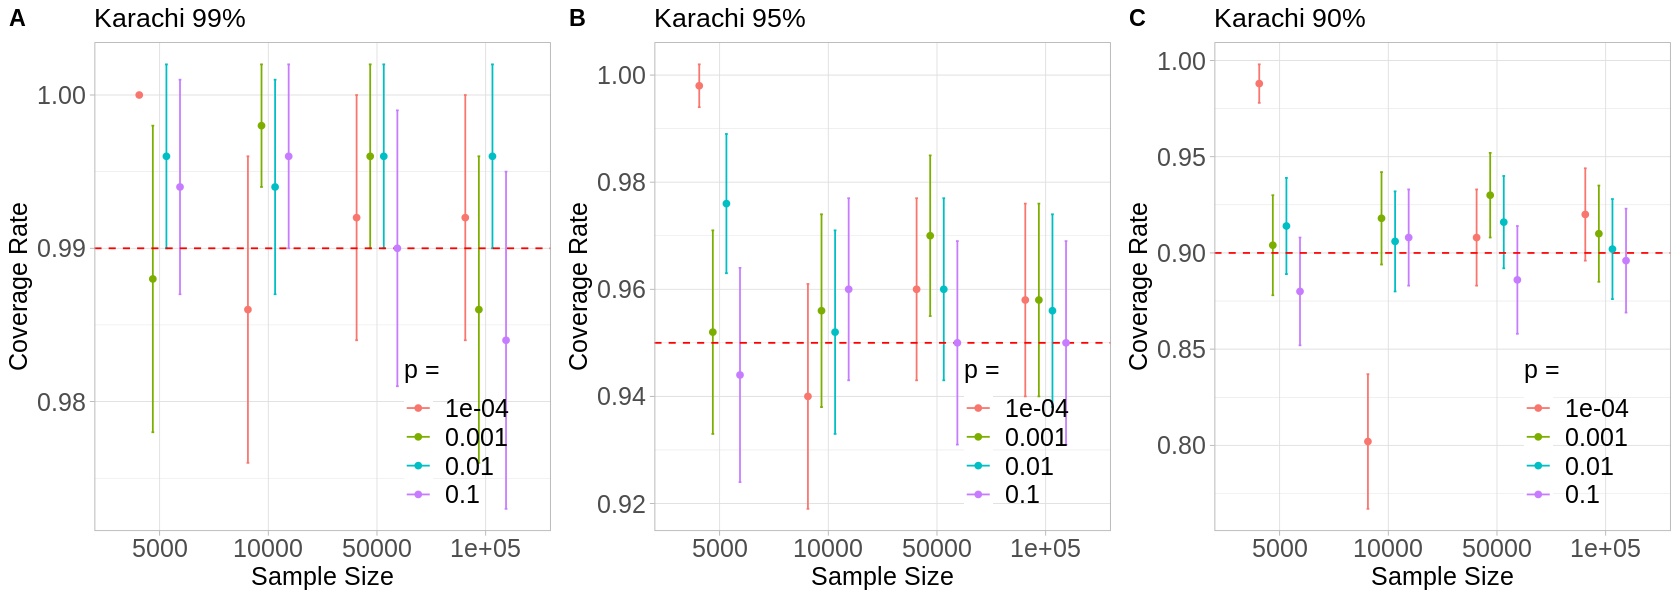

In [6]:
distn <- 'karachi'
title <- 'Karachi'

options(repr.plot.width=14, repr.plot.height=5)
plt1 <- plt_coverages(0.01, distn, title)
plt2 <- plt_coverages(0.05, distn, title)
plt3 <- plt_coverages(0.1, distn, title)

plot_grid(plt1, plt2, plt3, ncol = 3, nrow = 1, labels = c("A", "B", "C"))